<a href="https://colab.research.google.com/github/roshnikoduri/FakeNewsClassification/blob/main/FakeNewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Packages

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 7.9 MB/s 
     |████████████████████████████████| 115 kB 55.4 MB/s 
     |████████████████████████████████| 212 kB 57.2 MB/s 
     |████████████████████████████████| 141 kB 49.3 MB/s 
     |████████████████████████████████| 101 kB 3.9 MB/s 
     |████████████████████████████████| 596 kB 47.2 MB/s 
     |████████████████████████████████| 127 kB 22.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.0 MB/s 
     |████████████████████████████████| 6.6 MB 24.0 MB/s 


In [ ]:

from datasets import list_datasets, list_metrics, load_dataset, load_metric

from pprint import pprint


import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt



nltk.download('stopwords')

# quiet future deprecation warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Load Dataset

In [ ]:
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Journalism/Fake%20News/fake_news_data.csv"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Journalism/Fake%20News/true_news_data.csv"
fake_news_data = pd.read_csv('fake_news_data.csv')
true_news_data = pd.read_csv('true_news_data.csv')

fake_news_data.csv  100%[===================>]  59.88M   138MB/s    in 0.4s    
true_news_data.csv  100%[===================>]  51.10M  91.6MB/s    in 0.6s    


### Exploratory Data Analysis

In [ ]:
print(len(fake_news_data))
print(len(true_news_data))
fake_news_data.head()

23481
21417


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


[ 2893  1898  3597 ... 25065  2685  5251]


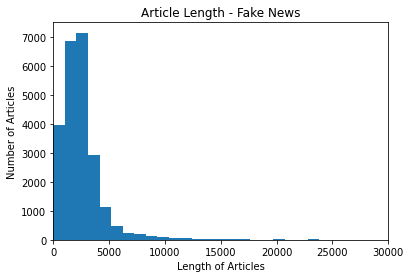

In [ ]:
fake_news_data['length'] = [len(text) for text in fake_news_data.text]
x = fake_news_data['length'].values
print(x)
plt.hist(x, bins = 50)
plt.xlim(0, 30000)

plt.title("Article Length - Fake News")
plt.ylabel("Number of Articles")
plt.xlabel("Length of Articles")

plt.show()

In [ ]:
fake_news_data.columns

[4659 4077 2789 ... 1950 1199 1338]


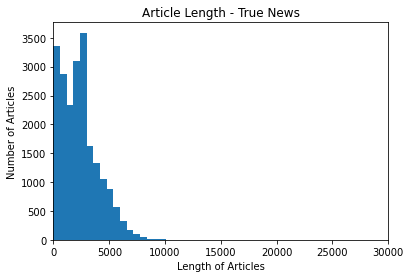

In [ ]:
true_news_data['length'] = [len(text) for text in true_news_data.text]
x = true_news_data['length'].values
print(x)
plt.hist(x, bins = 50)
plt.xlim(0, 30000)

plt.title("Article Length - True News")
plt.ylabel("Number of Articles")
plt.xlabel("Length of Articles")

plt.show()

In [ ]:
# something something correlated to likes
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# text cleaning maintaining all of our text as one string
text = " ".join(fake_news_data['text'])

text = text.lower() # try adding this back in and see what happens!

text = "".join(_ for _ in text if _ not in punctuation)

text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

top100 = Counter(text).most_common(20)
print(top100)

[('trump', 73422), ('said', 31008), ('people', 25941), ('president', 25495), ('would', 23420), ('one', 22865), ('us', 22005), ('clinton', 17957), ('obama', 17760), ('like', 17596), ('donald', 17101), ('also', 15221), ('new', 14135), ('news', 14099), ('even', 13658), ('hillary', 13510), ('white', 12767), ('time', 12689), ('state', 12494), ('via', 11164)]


20


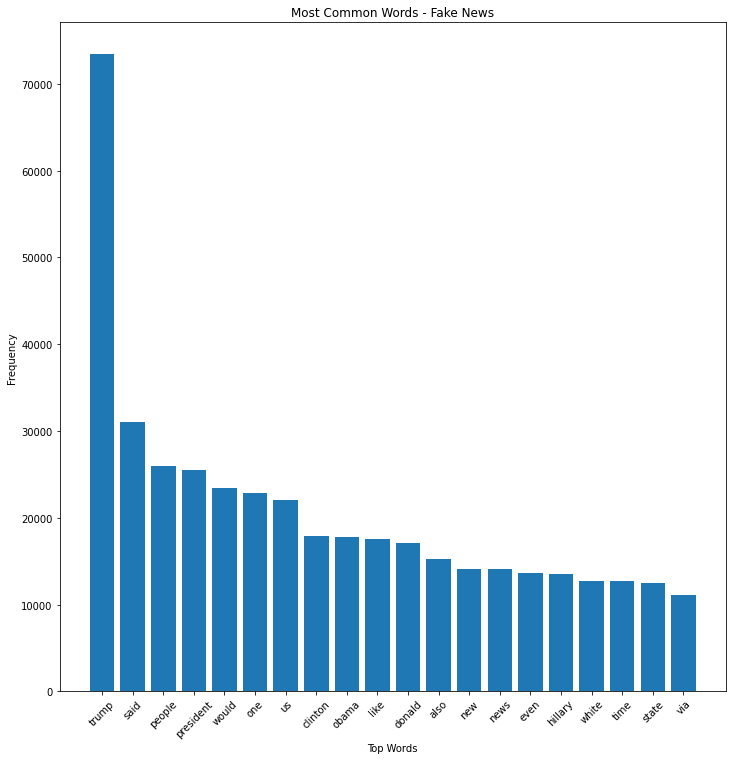

In [ ]:
x = [word[0] for word in top100]
y = [word[1] for word in top100]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xticks(rotation=45)
plt.tight_layout()


plt.title("Most Common Words - Fake News")
plt.ylabel("Frequency")
plt.xlabel('Top Words')
plt.bar(x[0: 20], y[0: 20])
print(len(x))

In [ ]:
# something something correlated to likes
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# text cleaning maintaining all of our text as one string
text = " ".join(true_news_data['text'])

text = text.lower() # try adding this back in and see what happens!

text = "".join(_ for _ in text if _ not in punctuation)

text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

top100 = Counter(text).most_common(20)
print(top100)

20


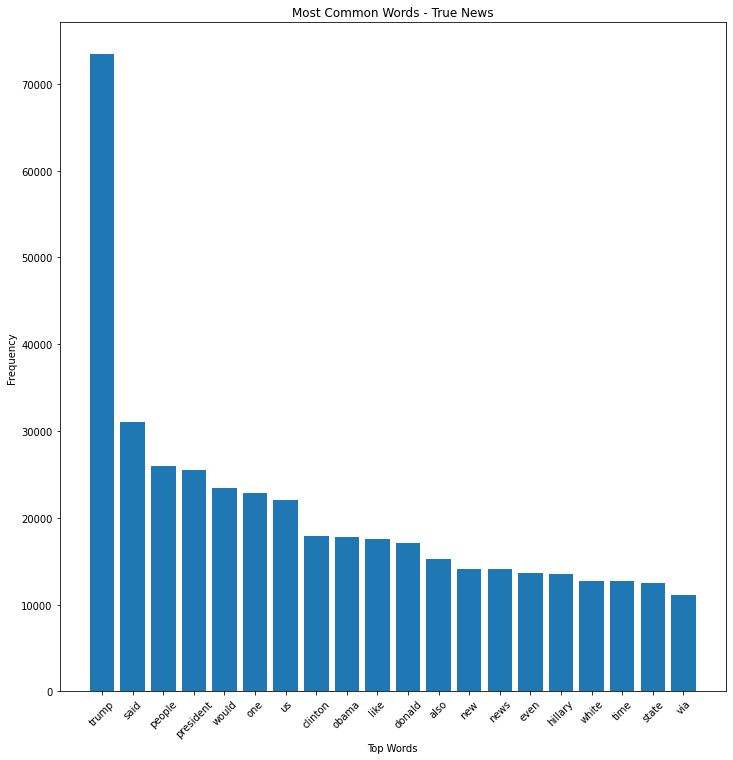

In [ ]:
x = [word[0] for word in top100]
y = [word[1] for word in top100]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.title("Most Common Words - True News")
plt.ylabel("Frequency")
plt.xlabel('Top Words')
plt.bar(x[0: 20], y[0: 20])
print(len(x))

In [ ]:
fake_news_data.info()

In [ ]:
set(fake_news_data.subject)

In [ ]:
set(true_news_data.subject)

In [ ]:
true_news_data['label'] = 1
fake_news_data['label'] = 0

In [ ]:
data = true_news_data.append(fake_news_data, ignore_index=True)

### Model Fine-Tuning

In [ ]:
!pip install -q transformers

In [ ]:
type(data)
data.columns
dataset = data.drop(['title', 'subject', 'date'], axis = 1)

In [ ]:
dataset.head()

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(dataset)

In [ ]:
dataset = dataset.train_test_split(test_size=0.2)

In [ ]:
print(dataset['train'][0])
print(dataset.keys())

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)

  0%|          | 0/36 [00:00<?, ?ba/s]

  0%|          | 0/9 [00:00<?, ?ba/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
def compute_metrics(pred):
    """
    this function is used within the model to calculate the accuracy, f1, precision, recall

    Args:
        param1 (int): either 1 or 0
    Returns:
        float: decimal values for accuracy, f1, precision, recall.

    """
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics = compute_metrics,
    data_collator=data_collator,
)

trainer.train()

In [ ]:
trainer.evaluate()

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(labels, preds) #is this correct?

Pushing Model To Hub

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("roshnikoduri/FakeNewsClassification")

model = AutoModelForSequenceClassification.from_pretrained("roshnikoduri/FakeNewsClassification")

### LIAR Dataset

In [ ]:
liar_dataset = load_dataset("liar")

In [ ]:
print(type(liar_dataset))

In [ ]:
liar_dataset['train']

In [ ]:
# 0 = false
# 1 = half true
#2 = mostly true
#3 = true
# 4 = barely true

refactored_values = []
for value in liar_dataset['train']['label']:
  if value == 2 or value ==3:
    refactored_values.append(1)
  elif value == 0 or value == 1 or value == 4:
    refactored_values.append(0)

# 0 = false, 1 = true

In [ ]:
statements = []
for value in liar_dataset['train']['statement']:
  statements.append(value)

In [ ]:
import gdown
import os

In [ ]:
gdown.download(
        "https://drive.google.com/drive/folders/1gVIgMuxdXZt9HhXU2UxuhCfXD6VF9KYu",
        "/model",
        quiet=True
    )

/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  url="https://drive.google.com/uc?id={}".format(file_id)


'/model'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
model_save_name = F"/content/gdrive/MyDrive/fake_news_project/"

path = '/content/model'

In [ ]:
import shutil
shutil.move(model_save_name, path)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("/content/model/checkpoint-11000")

model = AutoModelForSequenceClassification.from_pretrained("/content/model/checkpoint-11000")

In [ ]:
from transformers import TextClassificationPipeline

In [ ]:
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [ ]:
statement = "hello my name is roshni"
prediction = pipe(statement)
print(prediction)

In [ ]:
print(refactored_values)

In [ ]:
#run through statements in liar and get label, compare them to real label for accuracy
def accuracy_function(refactored_values, statements):
  correct_predictions = 0
  total_values = len(refactored_values)
  for i in range (total_values):
    prediction = pipe(statements[i])
    prediction = prediction[0]['label']
    if prediction == 'LABEL_0':
      prediction = 0
    elif prediction == 'LABEL_1':
      prediction = 1
    if(prediction == refactored_values[i]):
      correct_predictions+=1
  return (correct_predictions / total_values)

In [ ]:
print(accuracy_function(refactored_values, statements))

###Streamlit

In [ ]:
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 7.2 MB/s 
     |████████████████████████████████| 181 kB 45.4 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 4.3 MB 51.7 MB/s 
     |████████████████████████████████| 164 kB 68.8 MB/s 
     |████████████████████████████████| 235 kB 56.0 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 132 kB 79.0 MB/s 
     |████████████████████████████████| 423 kB 58.7 MB/s 
     |████████████████████████████████| 132 kB 43.6 MB/s 
     |████████████████████████████████| 793 kB 71.1 MB/s 
     |████████████████████████████████| 381 kB 42.7 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=e30c3bc5a42e37b477fb2b9d03c59de3375549b1a129dd40def81e0deea2

In [ ]:
%%writefile app.py
import streamlit as st

import gdown
import shutil
from transformers import TextClassificationPipeline

from transformers import AutoTokenizer, AutoModelForSequenceClassification

st.text("My name is roshni")


article = st.text_input('enter an article')


tokenizer = AutoTokenizer.from_pretrained("model/checkpoint-11000")

model = AutoModelForSequenceClassification.from_pretrained("model/checkpoint-11000")

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer)

prediction = pipe(article)
st.text(prediction)



Overwriting app.py


In [ ]:
! pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyngrok import ngrok
#Publish Web App (Run this again whenever you make changes)
public_url = ngrok.connect(port='80')
print (public_url)
! streamlit run --server.port 80 app.py

NgrokTunnel: "http://ddef-34-125-31-30.ngrok.io" -> "http://localhost:80"
2022-08-09 18:59:16.301 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.125.31.30:80

